In [1]:
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import pandas as pd

# Logistic regression
Sources: 
- [sklearn model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
- [wiki](https://en.wikipedia.org/wiki/Logistic_regression)
- [MLMastery](https://machinelearningmastery.com/logistic-regression-for-machine-learning/)

## Simple example
Let's generate dataset first

In [26]:
def gen_example(lb: int, size: int, mult: int) -> pd.DataFrame:
    """
    Generates simple example DataFrame with x ft and y target
    Parameters:
    lb (int): lower boundary of x
    size (int): category size (dataset size = 2*size)
    mult (int): multiplier
    Returns:
    X (pd.DataFrame): dataset
    """
    x_values = np.concatenate((np.random.rand(size)*mult-lb, \
        np.random.rand(size)*mult), axis=0)    # array
    y_values = np.array([0]*size+[1]*size)  # labels array
    X = pd.DataFrame({'x': x_values, 'y': y_values})    # DataFrame
    return X

def plot_dataset(dataset: pd.DataFrame) -> None:
    """
    Plots dataset
    Parameters:
    dataset (pd.DataFrame): input DataFrame
    """
    plt.scatter(dataset.loc[dataset.y==0, 'x'], dataset.loc[dataset.y==0, 'y'], label=0)    # scatter first class
    plt.scatter(dataset.loc[dataset.y==1, 'x'], dataset.loc[dataset.y==1, 'y'], label=1)    # scatter second class
    plt.legend()
    plt.show()   

In [113]:
lb, size, mult = 20, 15, 10
X = gen_example(lb, size, mult)
X.sample(7) # sample data

,x,y
16,7.256796,1
22,6.401086,1
10,-15.200620,0
1,-13.456452,0
0,-16.003289,0
27,1.358081,1
24,6.058855,1


## Visualization
Plot the data

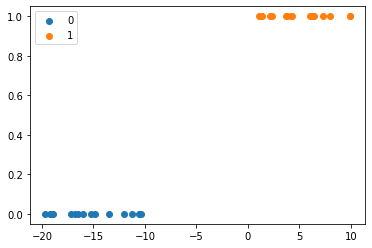

In [114]:
plot_dataset(X)

In [115]:
lb, size, mult = 8, 15, 10  # Keep calm and play around with different parameters :D
train_set = gen_example(lb, size, mult)
test_set = gen_example(lb, size//2, mult)

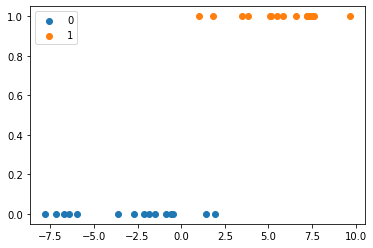

In [116]:
plot_dataset(train_set)

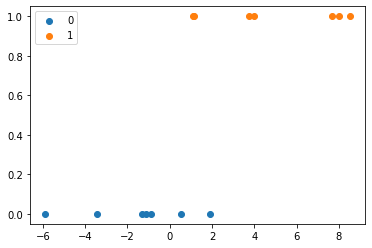

In [117]:
plot_dataset(test_set)

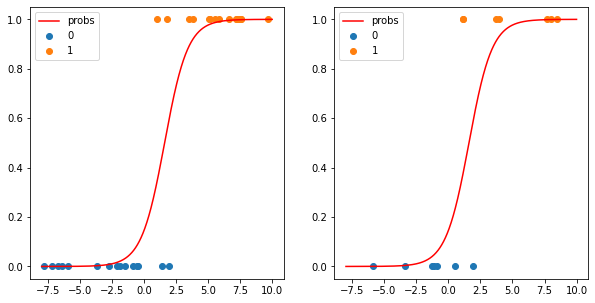

In [118]:
model = LogisticRegression()    # define the model
model.fit(train_set.x.values.reshape(-1, 1), train_set.y)   # fit model
# train_set.x.values.reshape(-1, 1) is needed since model accepts only 2D input and
# train_set.x is 1D array, train_set.x.values is an array of train_set.x contents in (size*2, ) shape
# *.reshape(-1, 1) turns it into an array of shape (size*2, 1)
X_test = np.linspace(-lb, mult, 1000)   # logistic regression plot x values
y_pred = model.predict_proba(X_test.reshape(-1, 1))[:, 1]   # model output
# here we use model.predict_proba instead of model.predict to get probabilities
# at every point in X_test array instead of [0, 1]^(size*2) vector
# *.reshape(-1, 1) used as above
_, axs = plt.subplots(1, 2, figsize=(10, 5))    # this trick enables us to plot two charts at once
for idx, dataset in enumerate((train_set, test_set)):
    # axs is just an array of ax objects, thus we can access them via a standard indexing
    axs[idx].plot(X_test, y_pred, color='red', label='probs')    # plot the curve
    axs[idx].scatter(dataset.loc[dataset.y==0, 'x'], dataset.loc[dataset.y==0, 'y'], label=0)
    axs[idx].scatter(dataset.loc[dataset.y==1, 'x'], dataset.loc[dataset.y==1, 'y'], label=1)
    # and the data
    axs[idx].legend()   # show the labels
plt.show()

### Once we've got all of this covered let'c compile it into one function

In [119]:
def do_everything(lb: int, size: int, mult: int) -> tuple:
    """
    Generates example train and test DataFrames with x ft and y target
    Plots them
    Trains model and returns datasets and model
    Parameters:
    lb (int): lower boundary of x
    size (int): category size (dataset size = 2*size)
    mult (int): multiplier
    Returns:
    train_set (pd.DataFrame), test_set (pd.DataFrame), model (LogisticRegression): datasets, model
    """
    train_set = gen_example(lb, size, mult)
    test_set = gen_example(lb, size//2, mult)
    print('train_set')
    plot_dataset(train_set)
    print('test_set')
    plot_dataset(test_set)
    model = LogisticRegression()
    model.fit(train_set.x.values.reshape(-1, 1), train_set.y)
    X_test = np.linspace(-lb, mult, 1000)
    y_pred = model.predict_proba(X_test.reshape(-1, 1))[:, 1]
    _, axs = plt.subplots(1, 2, figsize=(10, 5))
    for idx, dataset in enumerate((train_set, test_set)):
        axs[idx].plot(X_test, y_pred, color='red', label='probs')
        axs[idx].scatter(dataset.loc[dataset.y==0, 'x'], dataset.loc[dataset.y==0, 'y'], label=0)
        axs[idx].scatter(dataset.loc[dataset.y==1, 'x'], dataset.loc[dataset.y==1, 'y'], label=1)
        axs[idx].legend()
    plt.show()
    return train_set, test_set, model

# Confusion Matrix
Source: 
- [Confusion Matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)
- [Heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html)
- [CM How-To](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/)

Annotations:
- TN = True Negative (true value is 0 and model predicts 0)
- FN = False Negative (true value is 1 and model predicts 0)
- TP = True Positive (true value is 1 and model predicts 1)
- FP = False Positive (true value is 0 and model predicts 1)

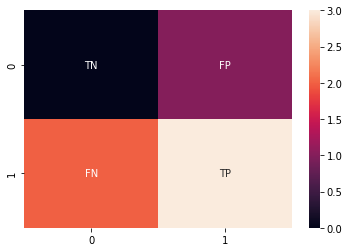

In [120]:
from seaborn import heatmap
heatmap([[0, 1], [2, 3]], annot=[['TN', 'FP'], ['FN', 'TP']], fmt='')
plt.show()

In [121]:
from sklearn.metrics import confusion_matrix
y_pred_train = model.predict(train_set.x.values.reshape(-1, 1)) # predicted labels array (train_set)
y_pred_test = model.predict(test_set.x.values.reshape(-1, 1))   # predicted labels array (test_set)
cm_train = confusion_matrix(train_set.y, y_pred_train)  # confusion matrix train_set
cm_test = confusion_matrix(test_set.y, y_pred_test)     # confusion matrix test_set
cm_train, cm_test   # print

(array([[14,  1],
        [ 1, 14]], dtype=int64),
 array([[6, 1],
        [2, 5]], dtype=int64))

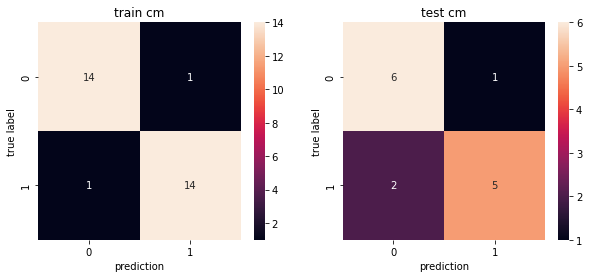

In [122]:
_, axs = plt.subplots(1, 2, figsize=(10, 4))    # same trick as before
heatmap(cm_train, annot=True, ax=axs[0])    # we can pass ax object as a parameter to the heatmap
heatmap(cm_test, annot=True, ax=axs[1])     # to plot it on a dedicated subplot
axs[0].set_title('train cm')    # setting title
axs[1].set_title('test cm')
for idx in (0, 1):
    axs[idx].set_xlabel('prediction')
    axs[idx].set_ylabel('true label')
plt.show()

# Metrics

## The most important ones: [wiki](https://en.wikipedia.org/wiki/Precision_and_recall)
- [accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) = (TP+TN)/(TP+TN+FP+FN)
- [precision](https://www.google.com/search?q=precision+sklearn&oq=precision+sklearn&aqs=chrome..69i57j0i22i30l9.1827j0j4&sourceid=chrome&ie=UTF-8) = TP/(TP+FP)
- [recall](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html) = TP/(TP+FN)

In [123]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
y_pred_train = model.predict(train_set.x.values.reshape(-1, 1))
y_pred_test = model.predict(test_set.x.values.reshape(-1, 1))
print('Training set')
print('Accuracy:', accuracy_score(test_set.y, y_pred_test))
print('Precision:', precision_score(test_set.y, y_pred_test))
print('Recall:', recall_score(test_set.y, y_pred_test))

Training set
Accuracy: 0.7857142857142857
Precision: 0.8333333333333334
Recall: 0.7142857142857143


### Once again compilation function

In [135]:
def show_metrics(model, dataset):
    y_pred = model.predict(dataset.x.values.reshape(-1, 1))
    heatmap(confusion_matrix(dataset.y, y_pred), annot=True)
    plt.show()
    print('Accuracy:', accuracy_score(dataset.y, y_pred))
    print('Precision:', precision_score(dataset.y, y_pred))
    print('Recall:', recall_score(dataset.y, y_pred))

## The less-obvious ones: 
- [ROC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html)
- [AUC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score)
- [Plotting the ROC curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html)
- [More info](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc)

To show these metrics at their best we need bigger datasets

train_set


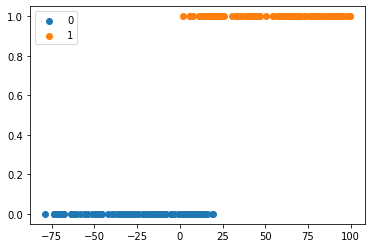

test_set


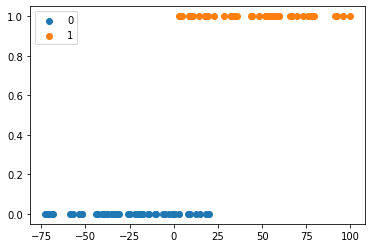

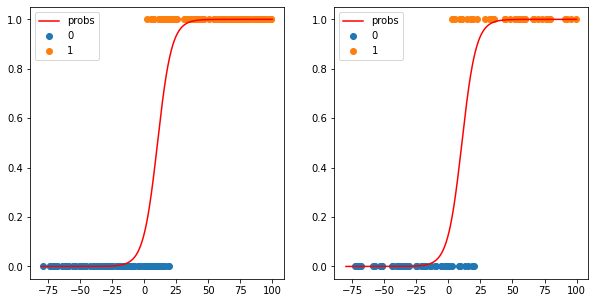

In [136]:
lb, size, mult = 80, 100, 100
train_set, test_set, model = do_everything(lb, size, mult)

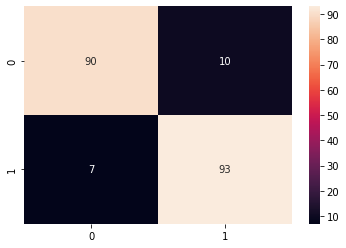

Accuracy: 0.915
Precision: 0.9029126213592233
Recall: 0.93


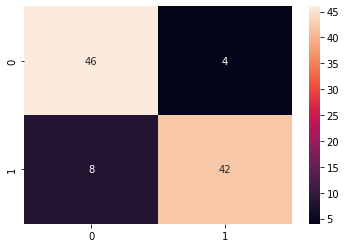

Accuracy: 0.88
Precision: 0.9130434782608695
Recall: 0.84


(None, None)

In [137]:
show_metrics(model, train_set), show_metrics(model, test_set)

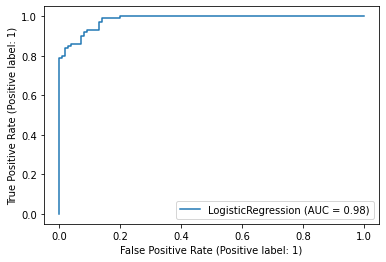

Area Under the ROC Curve score: 0.9831000000000001


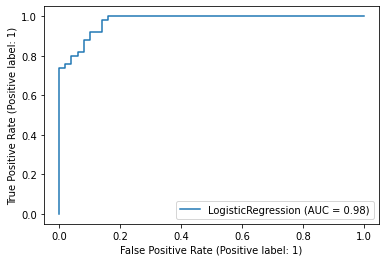

Area Under the ROC Curve score: 0.9763999999999999


In [140]:
from sklearn.metrics import RocCurveDisplay, roc_auc_score
RocCurveDisplay.from_estimator(model, train_set.x.values.reshape(-1, 1), train_set.y)
plt.show()
y_true = train_set.y
y_proba = model.predict_proba(train_set.x.values.reshape(-1, 1))[:, 1]
print('Area Under the ROC Curve score:', roc_auc_score(y_true, y_proba))
RocCurveDisplay.from_estimator(model, test_set.x.values.reshape(-1, 1), test_set.y)
y_true = test_set.y
y_proba = model.predict_proba(test_set.x.values.reshape(-1, 1))[:, 1]
plt.show()
print('Area Under the ROC Curve score:', roc_auc_score(y_true, y_proba))

# But why all of the above even matter? Imbalanced datasets case study